# 手寫阿拉伯數字辨識 完整版

## 步驟1：載入 MNIST 手寫阿拉伯數字資料

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[0].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 5
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

In [5]:
# 將非0的數字轉為1，顯示第2張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來，隱約可以看出數字為 0
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(data[i].astype(str)))
text_image

['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000001111100000000',
 '0000000000000011111100000000',
 '0000000000000111111111000000',
 '0000000000011111111111000000',
 '0000000000011111111111000000',
 '0000000000111111111111000000',
 '0000000001111111110011100000',
 '0000000011111100000011100000',
 '0000000111111100000011100000',
 '0000000111100000000011100000',
 '0000000111000000000011100000',
 '0000001111000000000011100000',
 '0000001111000000001111100000',
 '0000001110000000011111000000',
 '0000001110000000111100000000',
 '0000001110000001111000000000',
 '0000001111111111111000000000',
 '0000001111111111100000000000',
 '0000001111111110000000000000',
 '0000000111111100000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

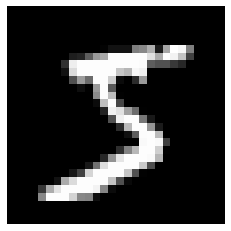

In [6]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

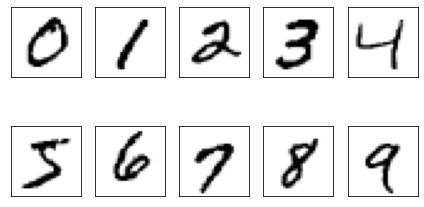

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

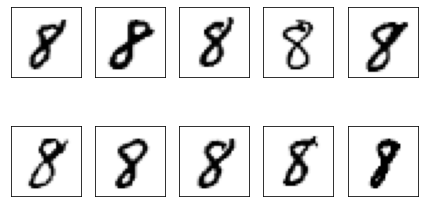

In [8]:
no=8
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [9]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [10]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 步驟6：結合訓練資料及模型，進行模型訓練

In [12]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3690 - accuracy: 0.8884 - val_loss: 0.1455 - val_accuracy: 0.9585
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1769 - accuracy: 0.9470 - val_loss: 0.1110 - val_accuracy: 0.9664
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1357 - accuracy: 0.9596 - val_loss: 0.1046 - val_accuracy: 0.9687
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1108 - accuracy: 0.9659 - val_loss: 0.0891 - val_accuracy: 0.9743
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0972 - accuracy: 0.9706 - val_loss: 0.0868 - val_accuracy: 0.9739


In [25]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

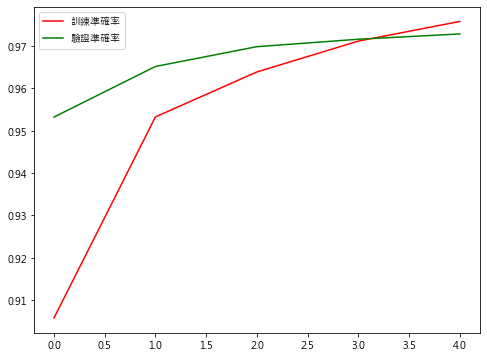

In [27]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

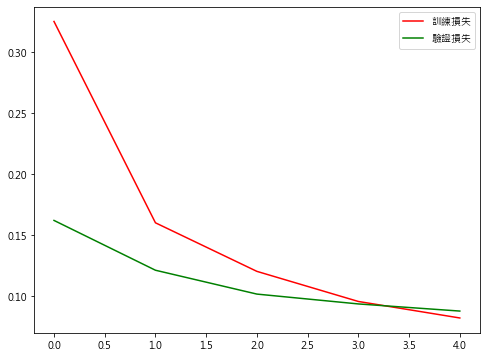

In [28]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [29]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0815
accuracy: 0.9744


In [30]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [31]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

0~9預測機率: [0.   0.   0.   0.   0.   0.04 0.96 0.   0.   0.  ]


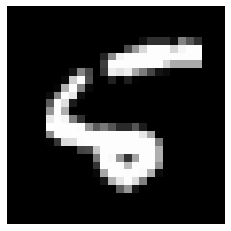

In [32]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟8：評估，暫不進行

## 步驟9：模型佈署

In [29]:
# 模型存檔
model.save('model.h5')

# 模型載入
model = tf.keras.models.load_model('model.h5')

## 步驟10：新資料預測

In [34]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/9.png'
image1 = io.imread(uploaded_file, as_gray=True)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

[2]


In [35]:
# 讀取影像並轉為單色
for i in range(10):
    uploaded_file = f'./myDigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # 縮為 (28, 28) 大小的影像
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1,28, 28) #/ 255

    # 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
    X1 = np.abs(1-X1)

    # 預測
    #predictions = model.predict_classes(X1)
    predictions = np.argmax(model.predict(X1), axis=-1)
    print(predictions)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[2]


In [36]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './9.png'
image1 = io.imread(uploaded_file, as_gray=True)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
#predictions = model.predict_classes(X1)
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

[1]


## 其他：顯示模型彙總資訊(summary)、繪製圖形顯示模型結構

In [37]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 繪製模型
#### 需安裝 graphviz (https://www.graphviz.org/download/)
#### 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
#### pip install graphviz pydotplus

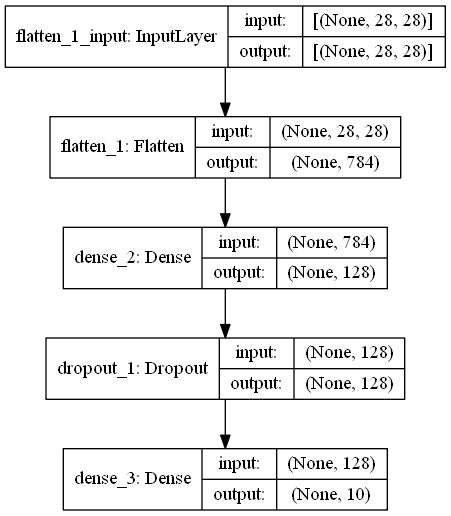

In [39]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [42]:
import pandas as pd 
predictions = np.argmax(model.predict(x_test_norm), axis=-1)
pd.crosstab(y_test, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9
實際值,,,,,,,,,,
0,970,0,1,2,1,1,2,1,1,1
1,0,1125,2,1,0,1,2,0,4,0
2,10,4,990,8,3,0,2,7,8,0
3,0,0,2,995,0,1,0,5,4,3
4,0,0,6,0,964,0,1,2,2,7
5,2,1,0,13,1,859,7,0,7,2
6,8,3,0,1,2,3,937,0,4,0
7,2,13,8,3,2,0,0,993,1,6
8,4,3,3,7,3,6,3,3,938,4


In [43]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=np.argmax(model.predict(x_test_norm), axis=-1))

array([[ 970,    0,    1,    2,    1,    1,    2,    1,    1,    1],
       [   0, 1125,    2,    1,    0,    1,    2,    0,    4,    0],
       [  10,    4,  990,    8,    3,    0,    2,    7,    8,    0],
       [   0,    0,    2,  995,    0,    1,    0,    5,    4,    3],
       [   0,    0,    6,    0,  964,    0,    1,    2,    2,    7],
       [   2,    1,    0,   13,    1,  859,    7,    0,    7,    2],
       [   8,    3,    0,    1,    2,    3,  937,    0,    4,    0],
       [   2,   13,    8,    3,    2,    0,    0,  993,    1,    6],
       [   4,    3,    3,    7,    3,    6,    3,    3,  938,    4],
       [   2,    8,    0,    8,    8,    2,    1,    5,    2,  973]],
      dtype=int64)

In [44]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_1_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1',
    'trainable': True,
    'dtype': 'float32',
  

In [45]:
model.get_weights()

[array([[-0.06759743,  0.05863123, -0.0550188 , ...,  0.01552769,
          0.05903798,  0.08075448],
        [-0.0737899 , -0.00087796, -0.06380587, ...,  0.02183317,
         -0.02044501,  0.05470673],
        [-0.05270849,  0.01904546,  0.01858643, ...,  0.07454563,
          0.06612995,  0.01662049],
        ...,
        [ 0.04292759,  0.02338418, -0.01333501, ...,  0.07271896,
          0.07957747,  0.04908768],
        [-0.02903555, -0.05044446, -0.0512715 , ...,  0.03882056,
         -0.06470717,  0.02253173],
        [-0.01270323, -0.00953036, -0.00720369, ..., -0.07856096,
         -0.01564861,  0.05338772]], dtype=float32),
 array([ 0.08654147,  0.08377213,  0.09552854,  0.16140153, -0.05289309,
        -0.1095484 ,  0.15361993, -0.00603551,  0.021548  , -0.06882126,
        -0.00715543,  0.1543499 , -0.11067603,  0.09557939, -0.08457397,
        -0.18371552, -0.06953707,  0.00530442, -0.10042416, -0.0552815 ,
         0.01831597,  0.1283104 ,  0.03347355, -0.02297756, -0.034

In [46]:
model.get_layer(index=1).name

'dense_2'

In [48]:
model.get_layer(index=1).get_weights()

[array([[-0.06759743,  0.05863123, -0.0550188 , ...,  0.01552769,
          0.05903798,  0.08075448],
        [-0.0737899 , -0.00087796, -0.06380587, ...,  0.02183317,
         -0.02044501,  0.05470673],
        [-0.05270849,  0.01904546,  0.01858643, ...,  0.07454563,
          0.06612995,  0.01662049],
        ...,
        [ 0.04292759,  0.02338418, -0.01333501, ...,  0.07271896,
          0.07957747,  0.04908768],
        [-0.02903555, -0.05044446, -0.0512715 , ...,  0.03882056,
         -0.06470717,  0.02253173],
        [-0.01270323, -0.00953036, -0.00720369, ..., -0.07856096,
         -0.01564861,  0.05338772]], dtype=float32),
 array([ 0.08654147,  0.08377213,  0.09552854,  0.16140153, -0.05289309,
        -0.1095484 ,  0.15361993, -0.00603551,  0.021548  , -0.06882126,
        -0.00715543,  0.1543499 , -0.11067603,  0.09557939, -0.08457397,
        -0.18371552, -0.06953707,  0.00530442, -0.10042416, -0.0552815 ,
         0.01831597,  0.1283104 ,  0.03347355, -0.02297756, -0.034

In [49]:
model.count_params()

101770